In [1]:
!pip install watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.8 MB/s eta 0:00:00


Part 1 - Importing libraries

In [2]:
# Import of libraries

# System libraries
import re
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt

# Configuration for graph width and layout
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove alerts
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.11.11
Author: Library versions

re        : 2.2.1
numpy     : 1.26.4
plotly    : 5.24.1
pandas    : 2.2.2
seaborn   : 0.13.2
platform  : 1.0.8
watermark : 2.5.0
matplotlib: 3.10.0



Part 2 - Loading database

In [3]:
# Set the display.max_columns option to None
pd.set_option('display.max_columns', None)

# Loading dataset
data = pd.read_csv("/content/Heart_Disease_Prediction (2).csv")

In [4]:
# Viewing first 5 data
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [5]:
# Viewing first 5 data
data.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [6]:
# Info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
# Type data
data.dtypes

,0
Age,int64
Sex,int64
Chest pain type,int64
BP,int64
Cholesterol,int64
FBS over 120,int64
EKG results,int64
Max HR,int64
Exercise angina,int64
ST depression,float64


In [8]:
# Viewing rows and columns
data.shape

(270, 14)

Part 3 - Exploratory data analysis

In [9]:
# Exploratory data analysis (EDA)
print("\nDescriptive statistics of the training set")
data.describe().T


Descriptive statistics of the training set


,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.077778,9.201052,29.0,47.0,54.0,60.75,80.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.00,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.00,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.00,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.00,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.00,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.00,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.00,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.00,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.60,6.2


In [10]:
# Analysis of categorical and numerical variables
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=[np.number]).columns

print("\nCategorical Variables:", categorical_features)
print("Numeric Variables:", numerical_features)


Categorical Variables: Index(['Heart Disease'], dtype='object')
Numeric Variables: Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium'],
      dtype='object')


In [11]:
# Analysis of categorical variables
for col in categorical_features:
    print(f"\nDistribution of categorical variable {col}:")
    print(data[col].value_counts())


Distribution of categorical variable Heart Disease:
Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64


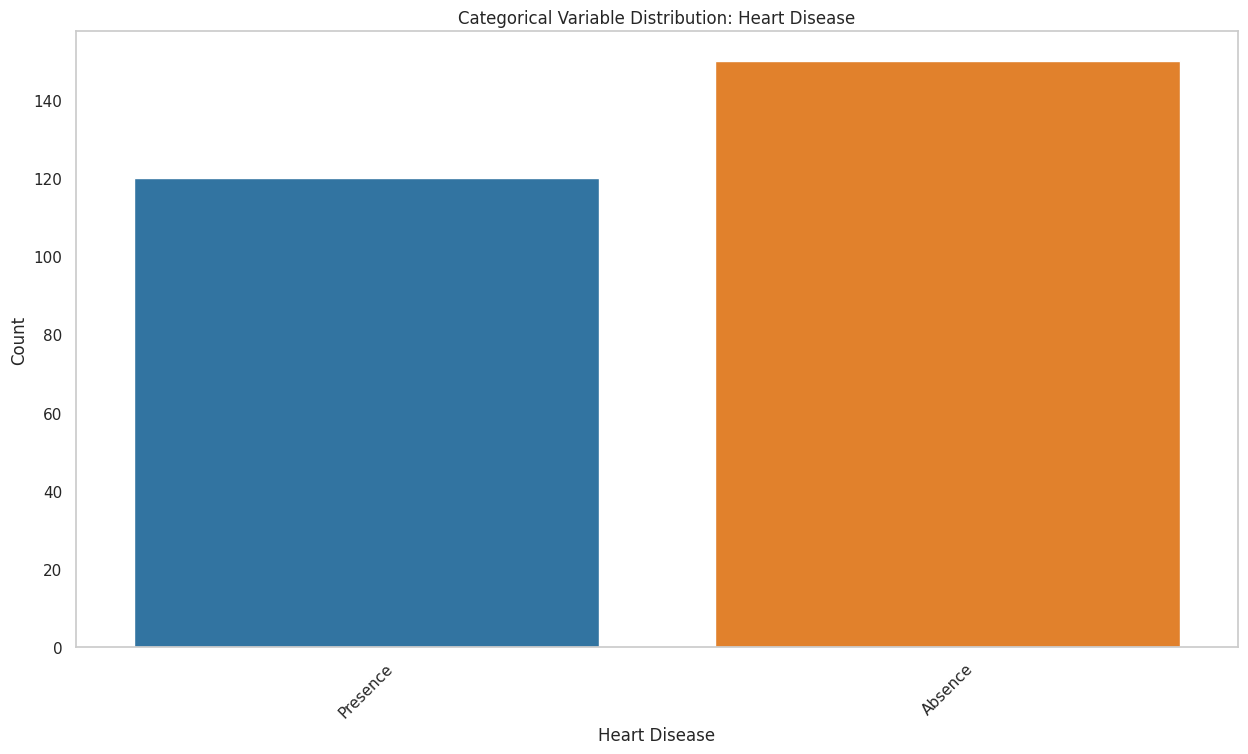

In [12]:
# Custom color palette with two colors
custom_palette = ['#1f77b4', '#ff7f0e']  # Blue and Orange

# Categorical variables
categorical_vars = ['Heart Disease']

# Numeric variables
numeric_vars = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
 'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
 'Slope of ST', 'Number of vessels fluro', 'Thallium']

# Create subplots for categorical variables
plt.figure(figsize=(15, 8))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, len(categorical_vars), i)
    sns.countplot(data=data, x=var, palette=custom_palette)
    plt.title(f'Categorical Variable Distribution: {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(False)
plt.show()

<Figure size 640x480 with 0 Axes>

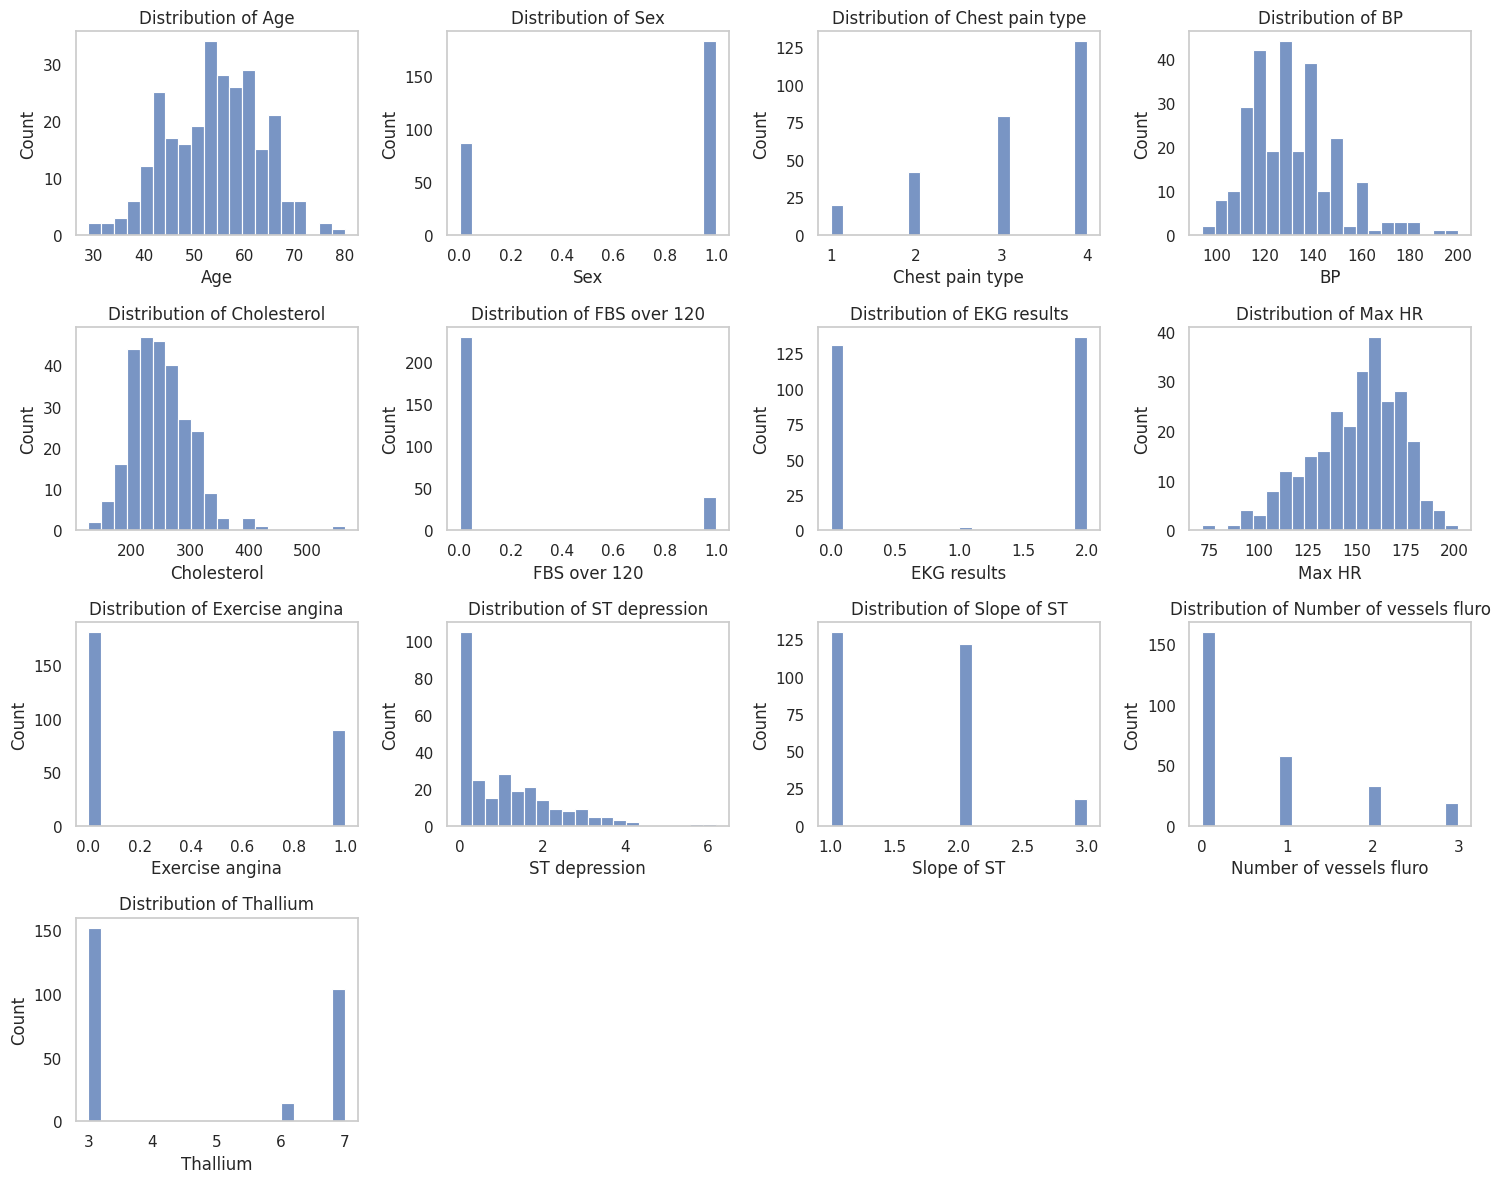

In [13]:
# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Display subplots for categorical variables
plt.show()

# Create subplots for numeric variables
plt.figure(figsize=(15, 12))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=data, x=var, bins=20)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.grid(False)

# Adjust layout to avoid overlapping labels
plt.tight_layout()

# Display subplots for numeric variables
plt.show()

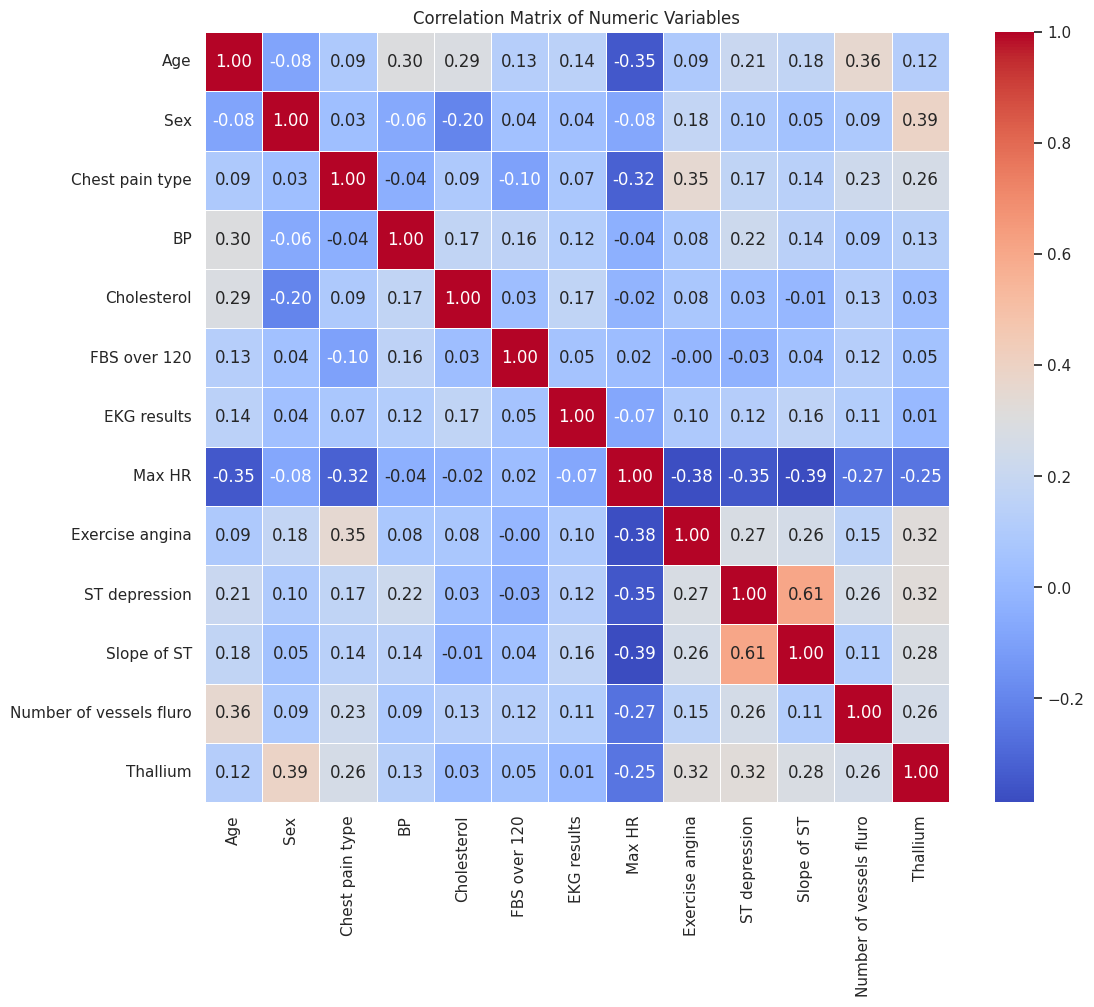

In [14]:
# Select only the numeric variables
numeric_vars = ['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
                'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
                'Slope of ST', 'Number of vessels fluro', 'Thallium']

# Calculate the correlation matrix
correlation_matrix = data[numeric_vars].corr()

# Plot the correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


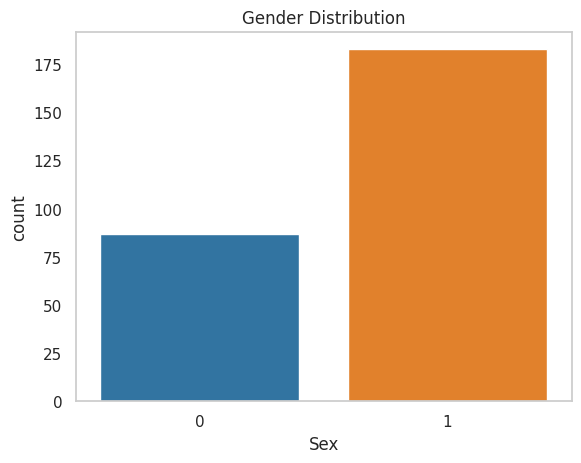

In [15]:
# Custom color palette with two colors
custom_palette = ['#1f77b4', '#ff7f0e']  # Blue and Orange

# View the distribution of the 'Gender' categorical variable
sns.countplot(x='Sex', data=data, palette=custom_palette)
plt.title('Gender Distribution')
plt.grid(False)
plt.show()

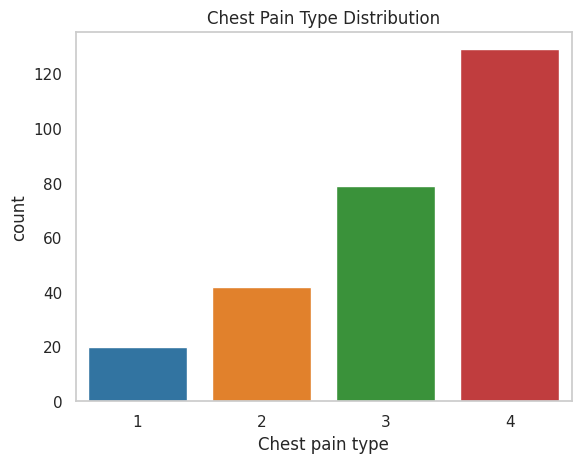

In [16]:
# Custom color palette with different colors
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red

# View the distribution of the 'Chest pain type' categorical variable
sns.countplot(x='Chest pain type', data=data, palette=custom_palette)
plt.title('Chest Pain Type Distribution')
plt.grid(False)
plt.show()

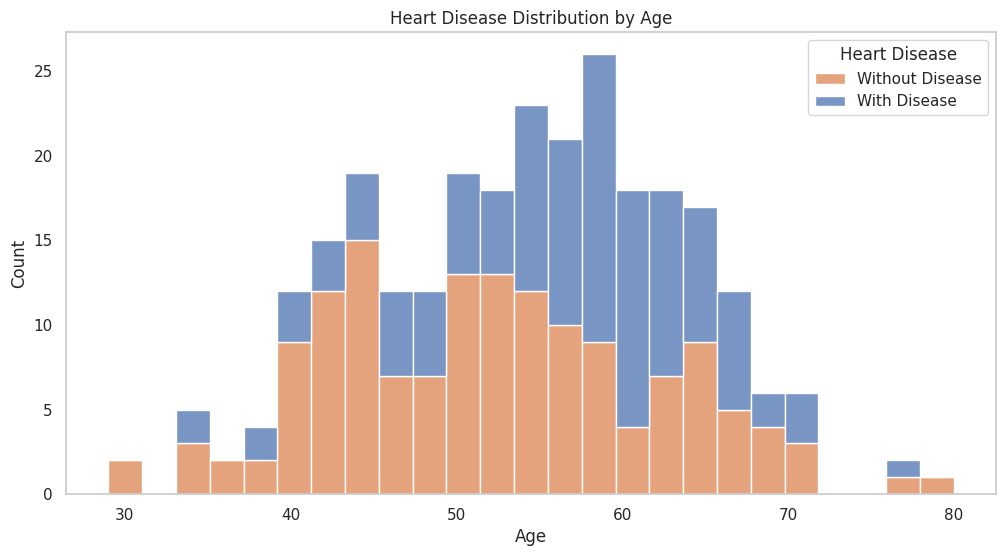

In [17]:
#4. Stacked Bar Chart of Heart Disease Distribution by Age
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x="Age", hue="Heart Disease", multiple="stack", bins=25)
plt.title('Heart Disease Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Without Disease', 'With Disease'])
plt.grid(axis='y')
plt.grid(False)
plt.show()

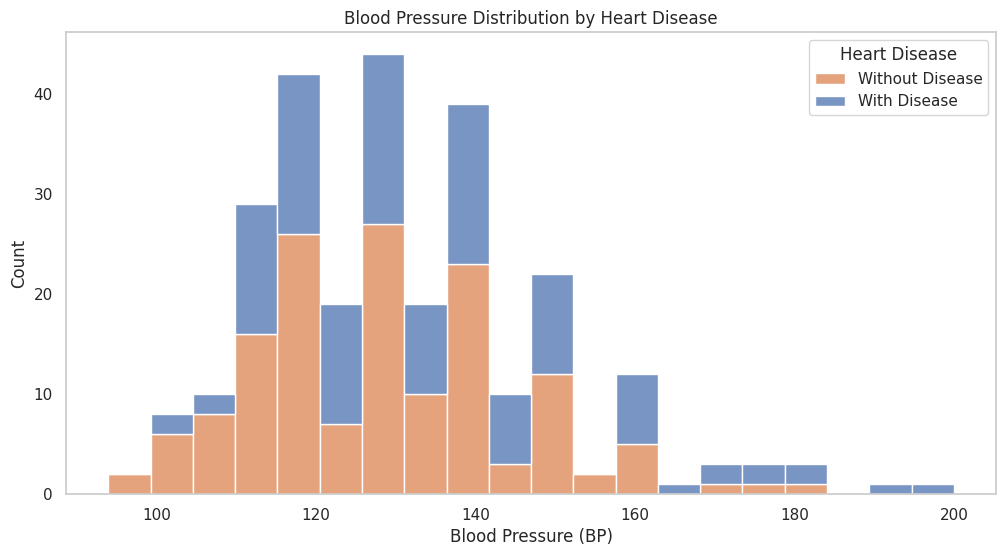

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x="BP", hue="Heart Disease", multiple="stack", bins=20)
plt.title('Blood Pressure Distribution by Heart Disease')
plt.xlabel('Blood Pressure (BP)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Without Disease', 'With Disease'])
plt.grid(axis='y')
plt.grid(False)
plt.show()

<Figure size 1000x600 with 0 Axes>

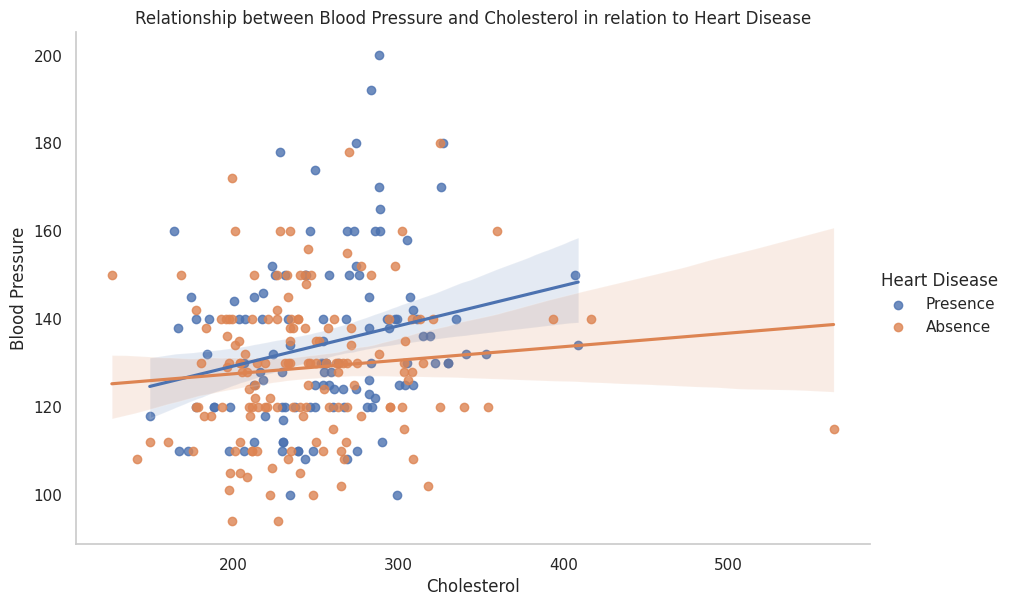

In [19]:
plt.figure(figsize=(10, 6))
sns.lmplot(x='Cholesterol', y='BP', hue='Heart Disease', data=data, height=6, aspect=1.5)
plt.title('Relationship between Blood Pressure and Cholesterol in relation to Heart Disease')
plt.xlabel('Cholesterol')
plt.ylabel('Blood Pressure')
plt.grid(False)
plt.show()

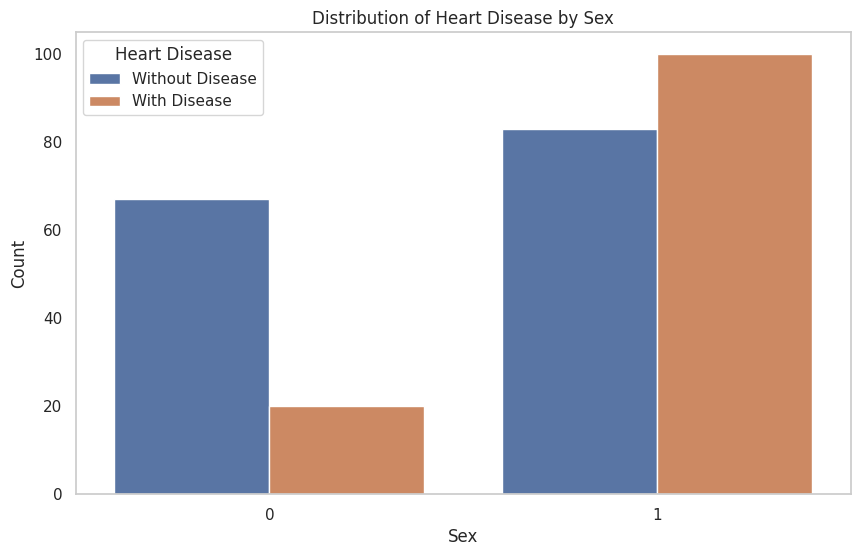

In [20]:
#3. Stacked Bar Chart of Heart Disease Distribution by Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Heart Disease', data=data)
plt.title('Distribution of Heart Disease by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Without Disease', 'With Disease'])
plt.grid(axis='y')
plt.grid(False)
plt.show()

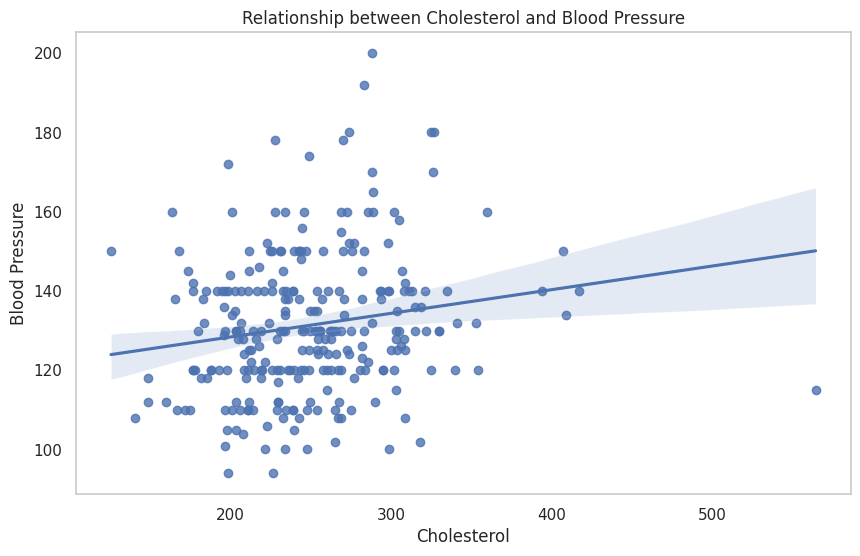

In [21]:
# 2. Scatter Plot with Regression Line between Cholesterol and Blood Pressure (BP)
plt.figure(figsize=(10, 6))
sns.regplot(x='Cholesterol', y='BP', data=data)
plt.title('Relationship between Cholesterol and Blood Pressure')
plt.xlabel('Cholesterol')
plt.ylabel('Blood Pressure')
plt.grid(False)
plt.show()

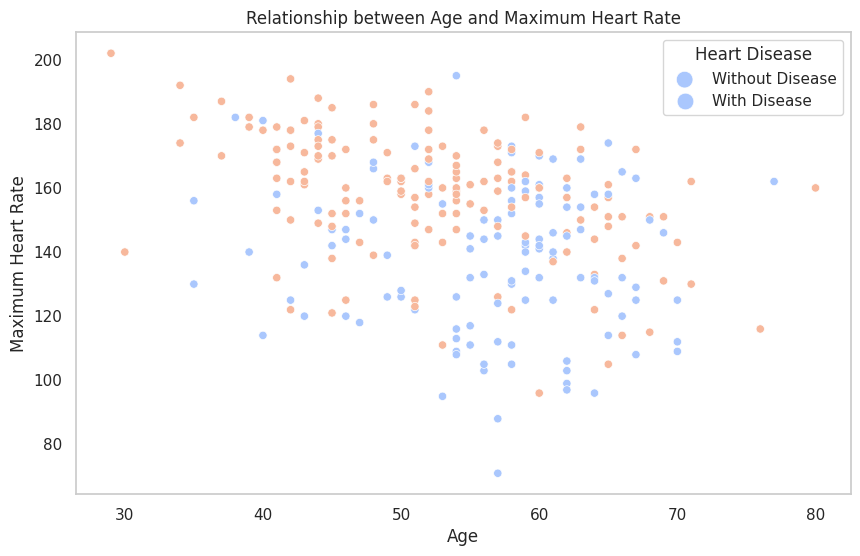

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Max HR', hue='Heart Disease', data=data, palette='coolwarm')
plt.title('Relationship between Age and Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.legend(title='Heart Disease', loc='upper right', labels=['Without Disease', 'With Disease'],
           facecolor='white', markerscale=2)
plt.grid(False)
plt.show()

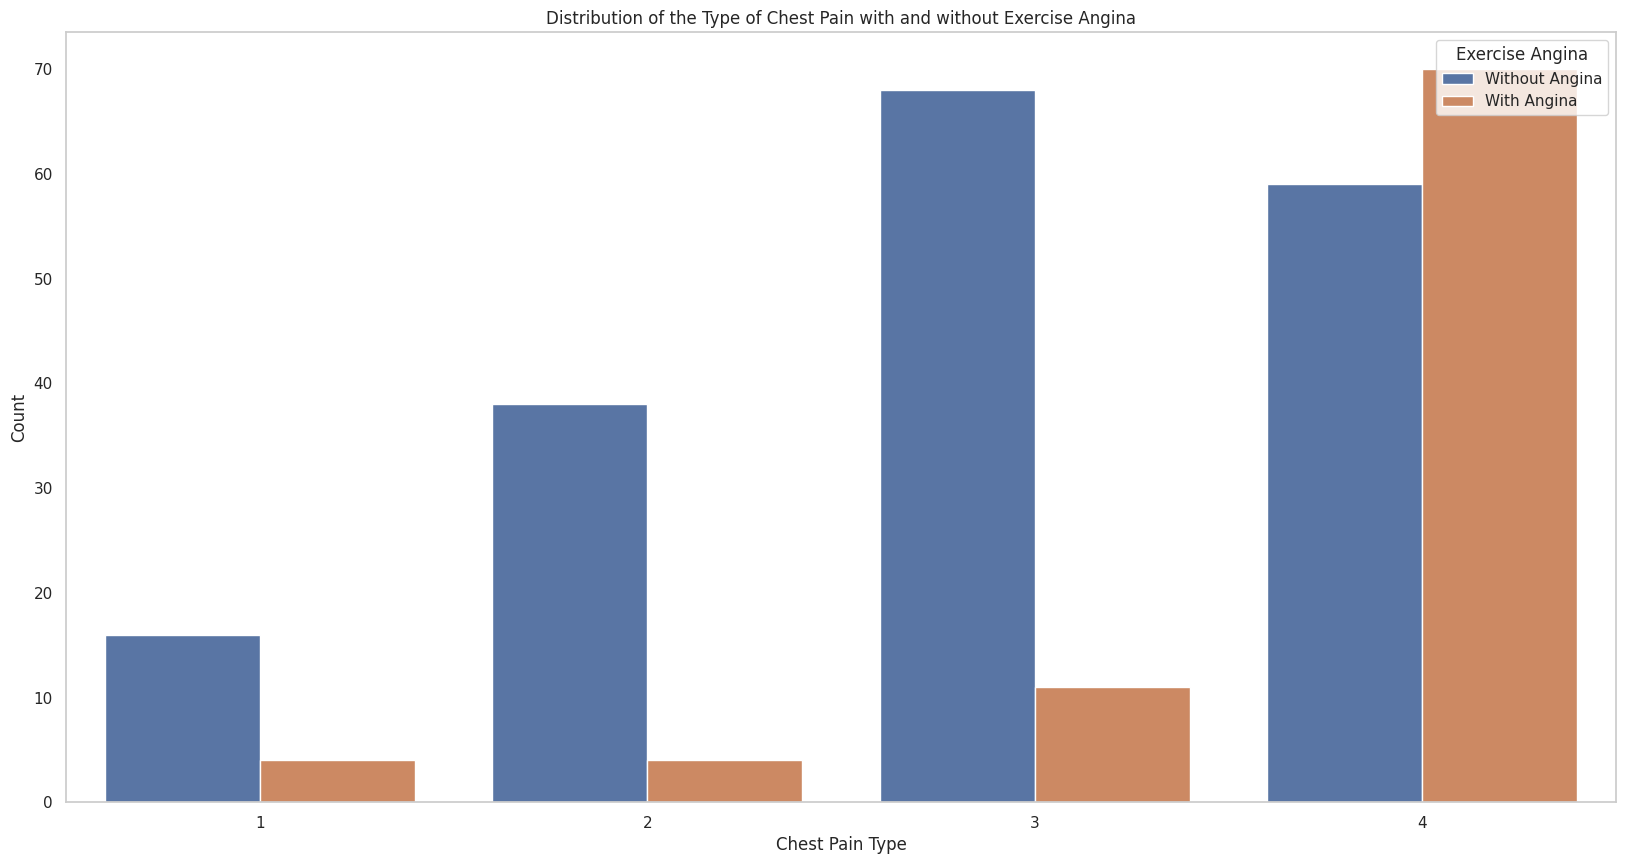

In [23]:
# Bar graph showing the distribution of "Type of Chest Pain" conditional on the presence or absence of "Exercise Angina"
plt.figure(figsize=(20, 10))
sns.countplot(x='Chest pain type', hue='Exercise angina', data=data)
plt.title('Distribution of the Type of Chest Pain with and without Exercise Angina')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Exercise Angina', loc='upper right', labels=['Without Angina', 'With Angina'])
plt.grid(False)
plt.show()

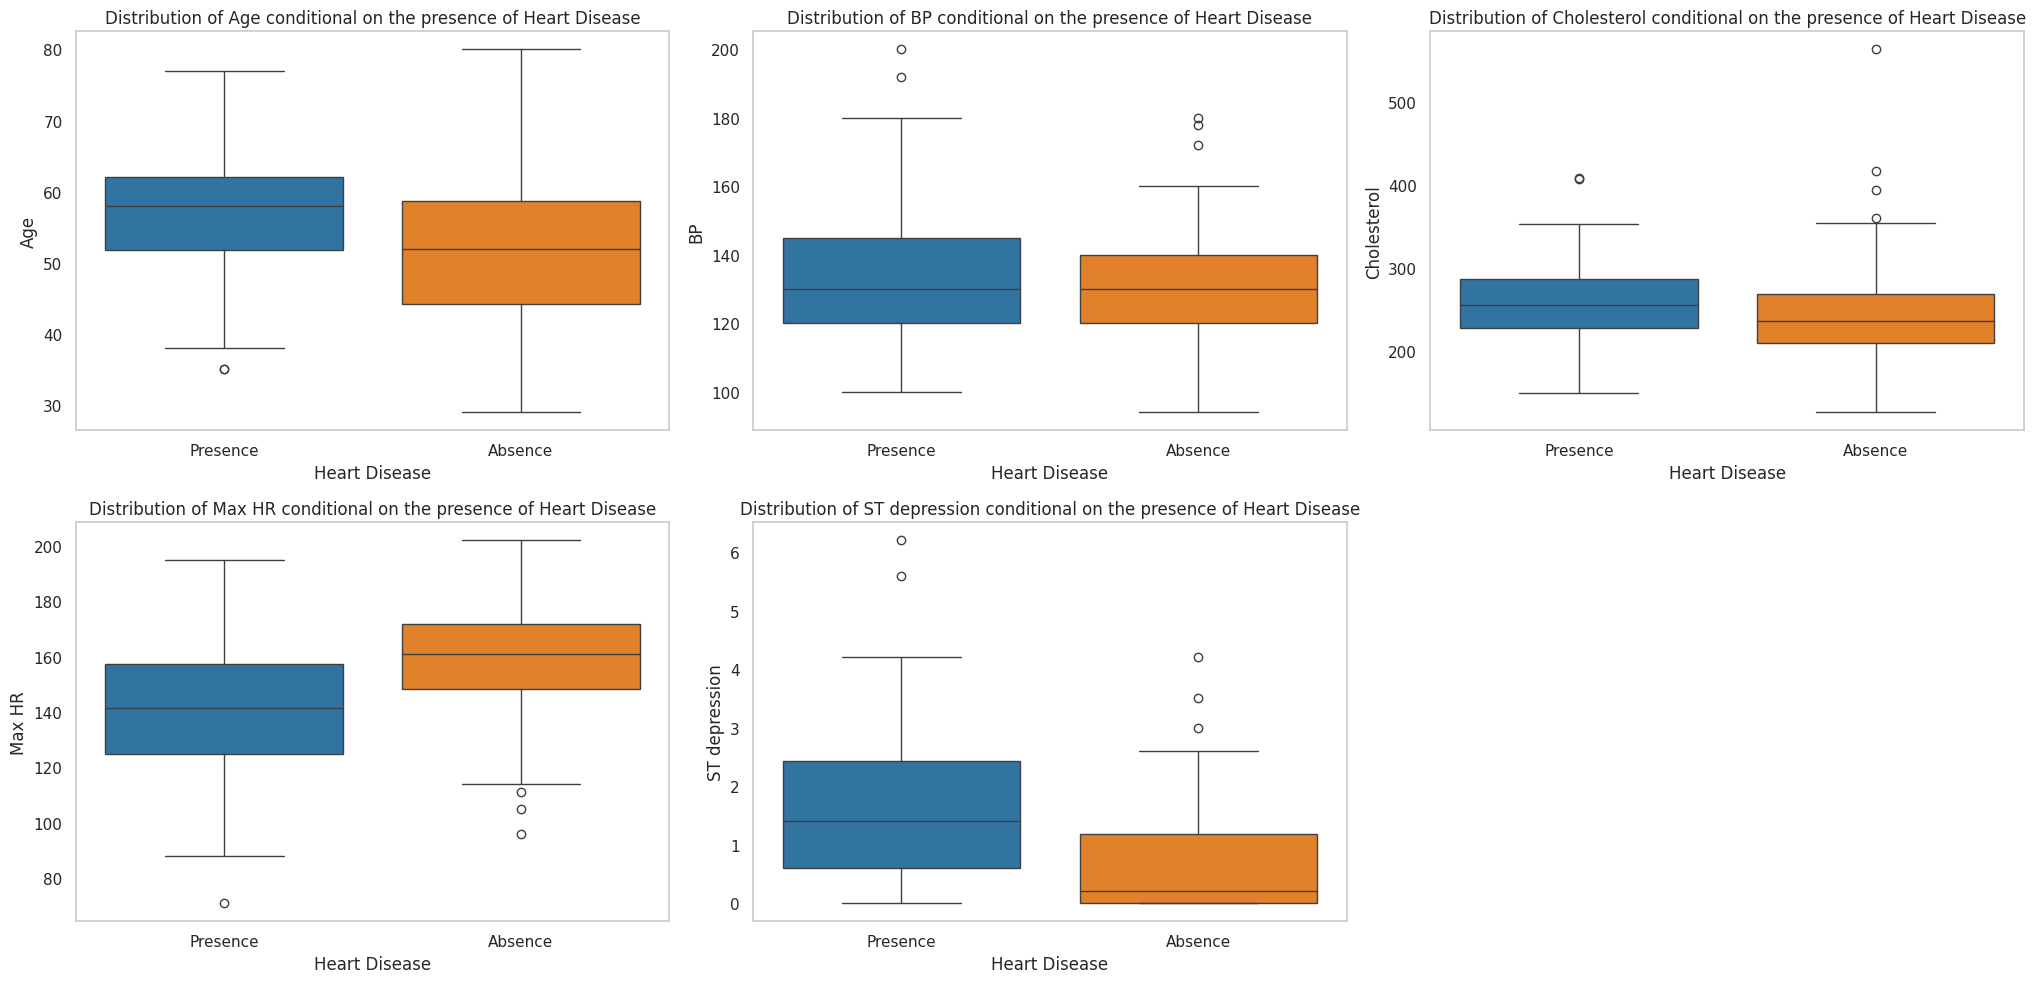

In [24]:
# 1. Conditional distribution analysis
# Define numerical columns of interest
num_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

# Custom color palette for distinguishing categories
custom_palette = ['#1f77b4', '#ff7f0e']  # Blue for 'No Disease', Orange for 'With Disease'

plt.figure(figsize=(20.5, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Heart Disease', y=col, data=data, palette=custom_palette)
    plt.title(f'Distribution of {col} conditional on the presence of Heart Disease')
    plt.xlabel('Heart Disease')
    plt.ylabel(col)
    plt.grid(False)

plt.tight_layout()
plt.show()

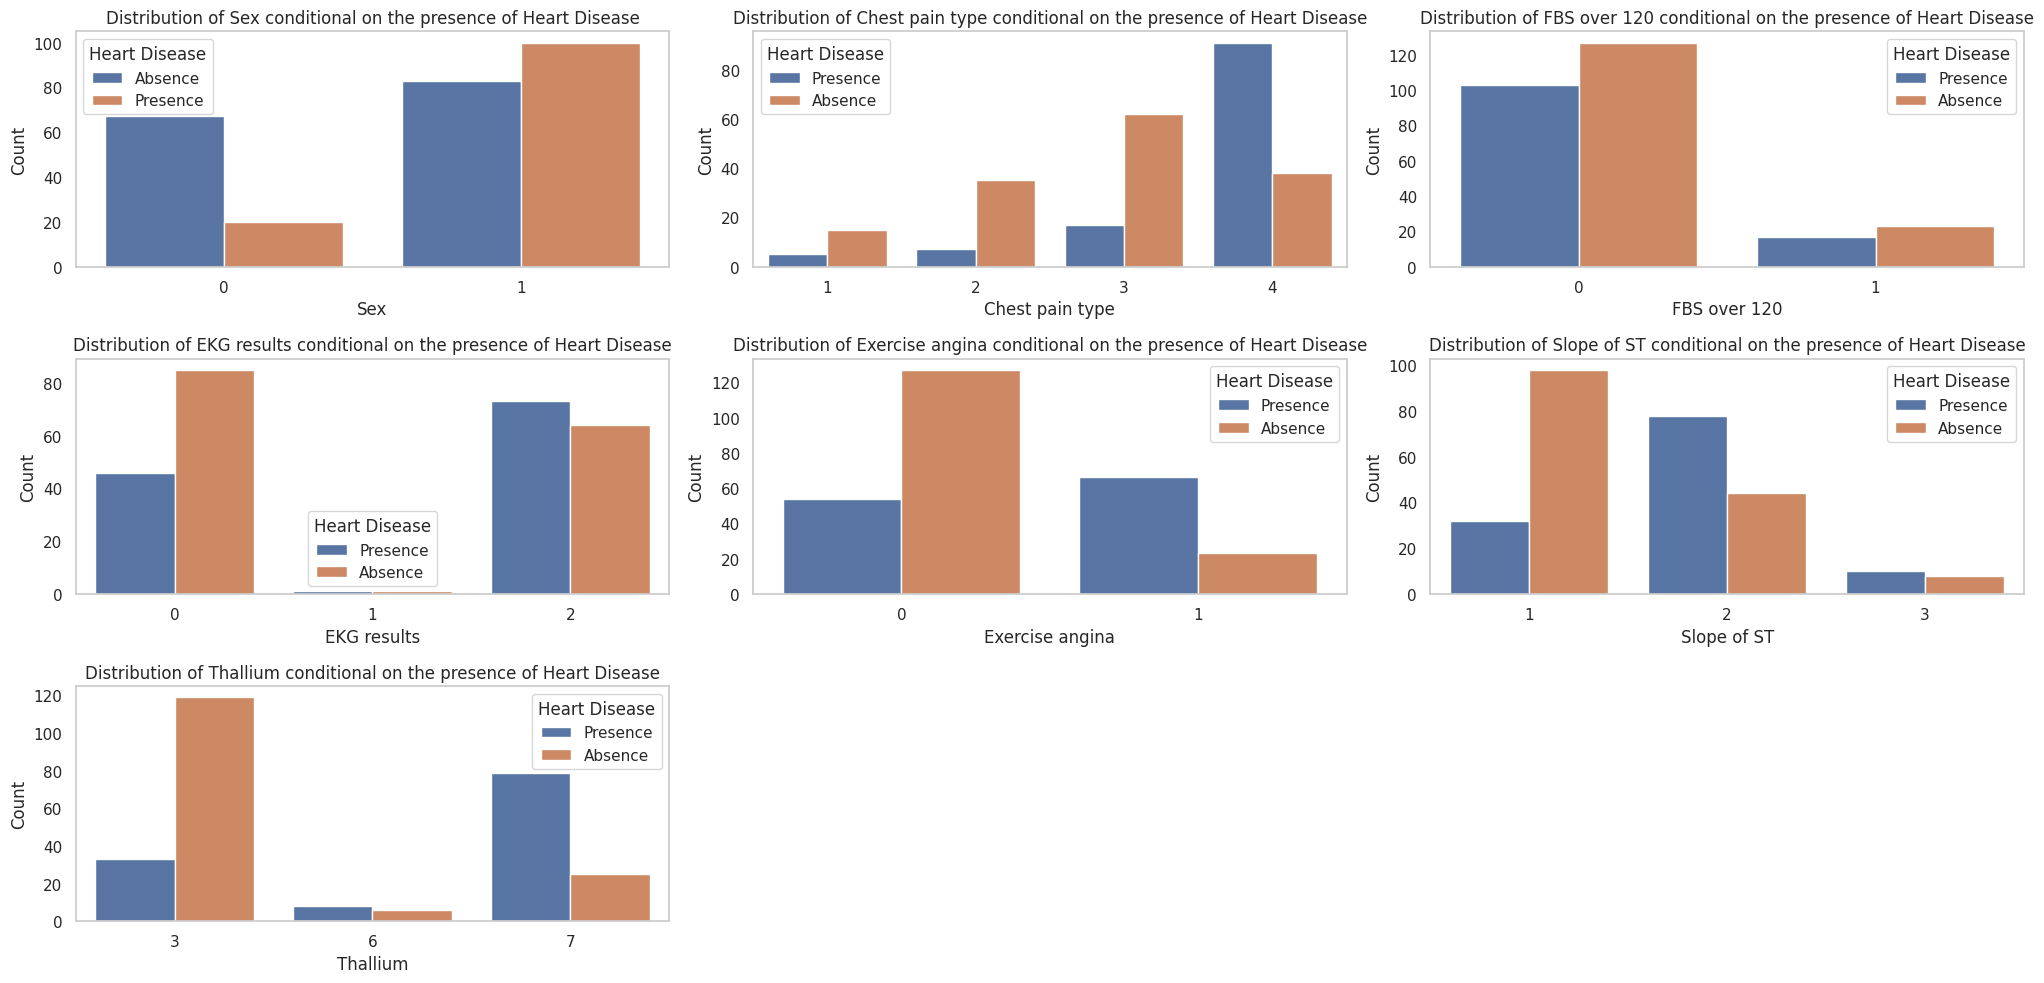

In [25]:
# 1. Conditional distribution analysis of categorical variables

cat_cols = ['Sex', 'Chest pain type', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST', 'Thallium']

plt.figure(figsize=(20.5, 10))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, hue='Heart Disease', data=data)
    plt.title(f'Distribution of {col} conditional on the presence of Heart Disease')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(False)

plt.tight_layout()
plt.show()

Part 4 - Data cleaning

In [26]:
# 1. Handling Missing Values
print("Number of missing values ​​per column:")
print(data.isnull().sum())

Number of missing values ​​per column:
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


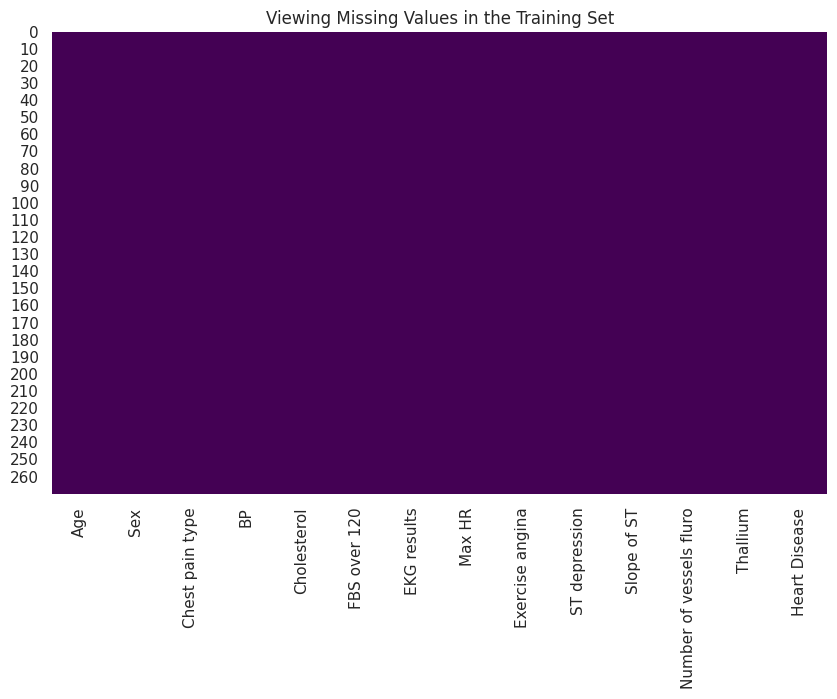

In [27]:
# View missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Viewing Missing Values in the Training Set")
plt.show()

In [ ]:
# If there are missing values, we can fill them with the mean, median or mode depending on the type of variable
# Fill in missing values with the median for numeric variables

#median_values = train_df.median()
#data.fillna(median_values, inplace=True)

In [ ]:
# Remove duplicate lines if any
#data.drop_duplicates(inplace=True)

Part 5 - Feature engineering

In [28]:
# Importing library
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()

# Applying to columns transforming into numbers
data['Heart Disease'] = label_encoder.fit_transform(data['Heart Disease'])

# Viewing
label_encoder

LabelEncoder()

In [29]:
# Viewing
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,0


Part 6 - Target column division

In [30]:
# Resources
X = data.drop(columns=['Heart Disease'])

# Target variable
y = data['Heart Disease']

In [31]:
# Visualizing data x
X.shape

(270, 13)

In [32]:
# Viewing y data
y.shape

(270,)

Part 7 – Model Training

In [33]:
# Importing library
from sklearn.model_selection import train_test_split

# Training and testing division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting categorical columns to dummy variables
#X_train = pd.get_dummies(X_train)
#X_test = pd.get_dummies(X_test)

# Viewing training data
print("Viewing rows and columns given by X train", X_train.shape)

# Viewing test data
print("Viewing rows and columns given y train", y_train.shape)

Viewing rows and columns given by X train (216, 13)
Viewing rows and columns given y train (216,)


Part 8 - Machine learning model

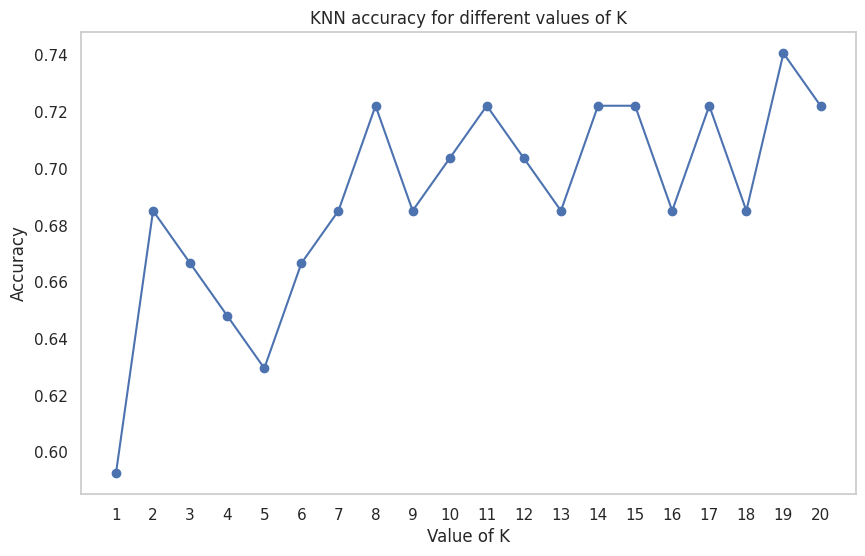

Best value of K: 19
Corresponding accuracy: 0.7407407407407407


In [34]:
# Find the k value of the K-NN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Find the ideal value of K
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('KNN accuracy for different values ​​of K')
plt.xlabel('Value of K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(False)
plt.show()

# Find the value of K with the greatest accuracy
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"Best value of K: {best_k}")
print(f"Corresponding accuracy: {best_accuracy}")

In [35]:
%%time

# Importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Models to be evaluated
models = [

    # Naive Bayes Model
    GaussianNB(),

    # Decision Tree Model
    DecisionTreeClassifier(random_state=42),

    # Random forest model
    RandomForestClassifier(n_estimators=100, random_state=42),

    # Logistic regression model
    LogisticRegression(random_state=50),

    # Ada Boost Model
    AdaBoostClassifier(random_state=45),

    # XGBoost Model
    # Parameter tree_method='gpu_hist' for XGBoost GPU
    XGBClassifier(random_state=42),

    # LightGBM Model
    # Parameter device='gpu' for LightGBM GPU
    LGBMClassifier(num_leaves=31,
                   boosting_type='gbdt',
                   bagging_fraction= 0.9,
                   learning_rate=0.05,
                   feature_fraction=0.9,
                   bagging_freq=50,
                   verbose=50),

    # K-Nearest Neighbors Model
    KNeighborsClassifier(n_neighbors=best_k),
]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(model)
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")

GaussianNB()

Model 1: GaussianNB

Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.9074074074074074
-----------------
DecisionTreeClassifier(random_state=42)

Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666
-----------------
RandomForestClassifier(random_state=42)

Model 3: RandomForestClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.7962962962962963
-----------------
LogisticRegression(random_state=50)

Model 4: LogisticRegression

Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.9074074074074074
-----------------
AdaBoostClassifier(random_state=45)

Model 5: AdaBoostClassifier

Training Accuracy: 0.8796296296296297
Testing Accuracy: 0.8333333333333334
-----------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metri

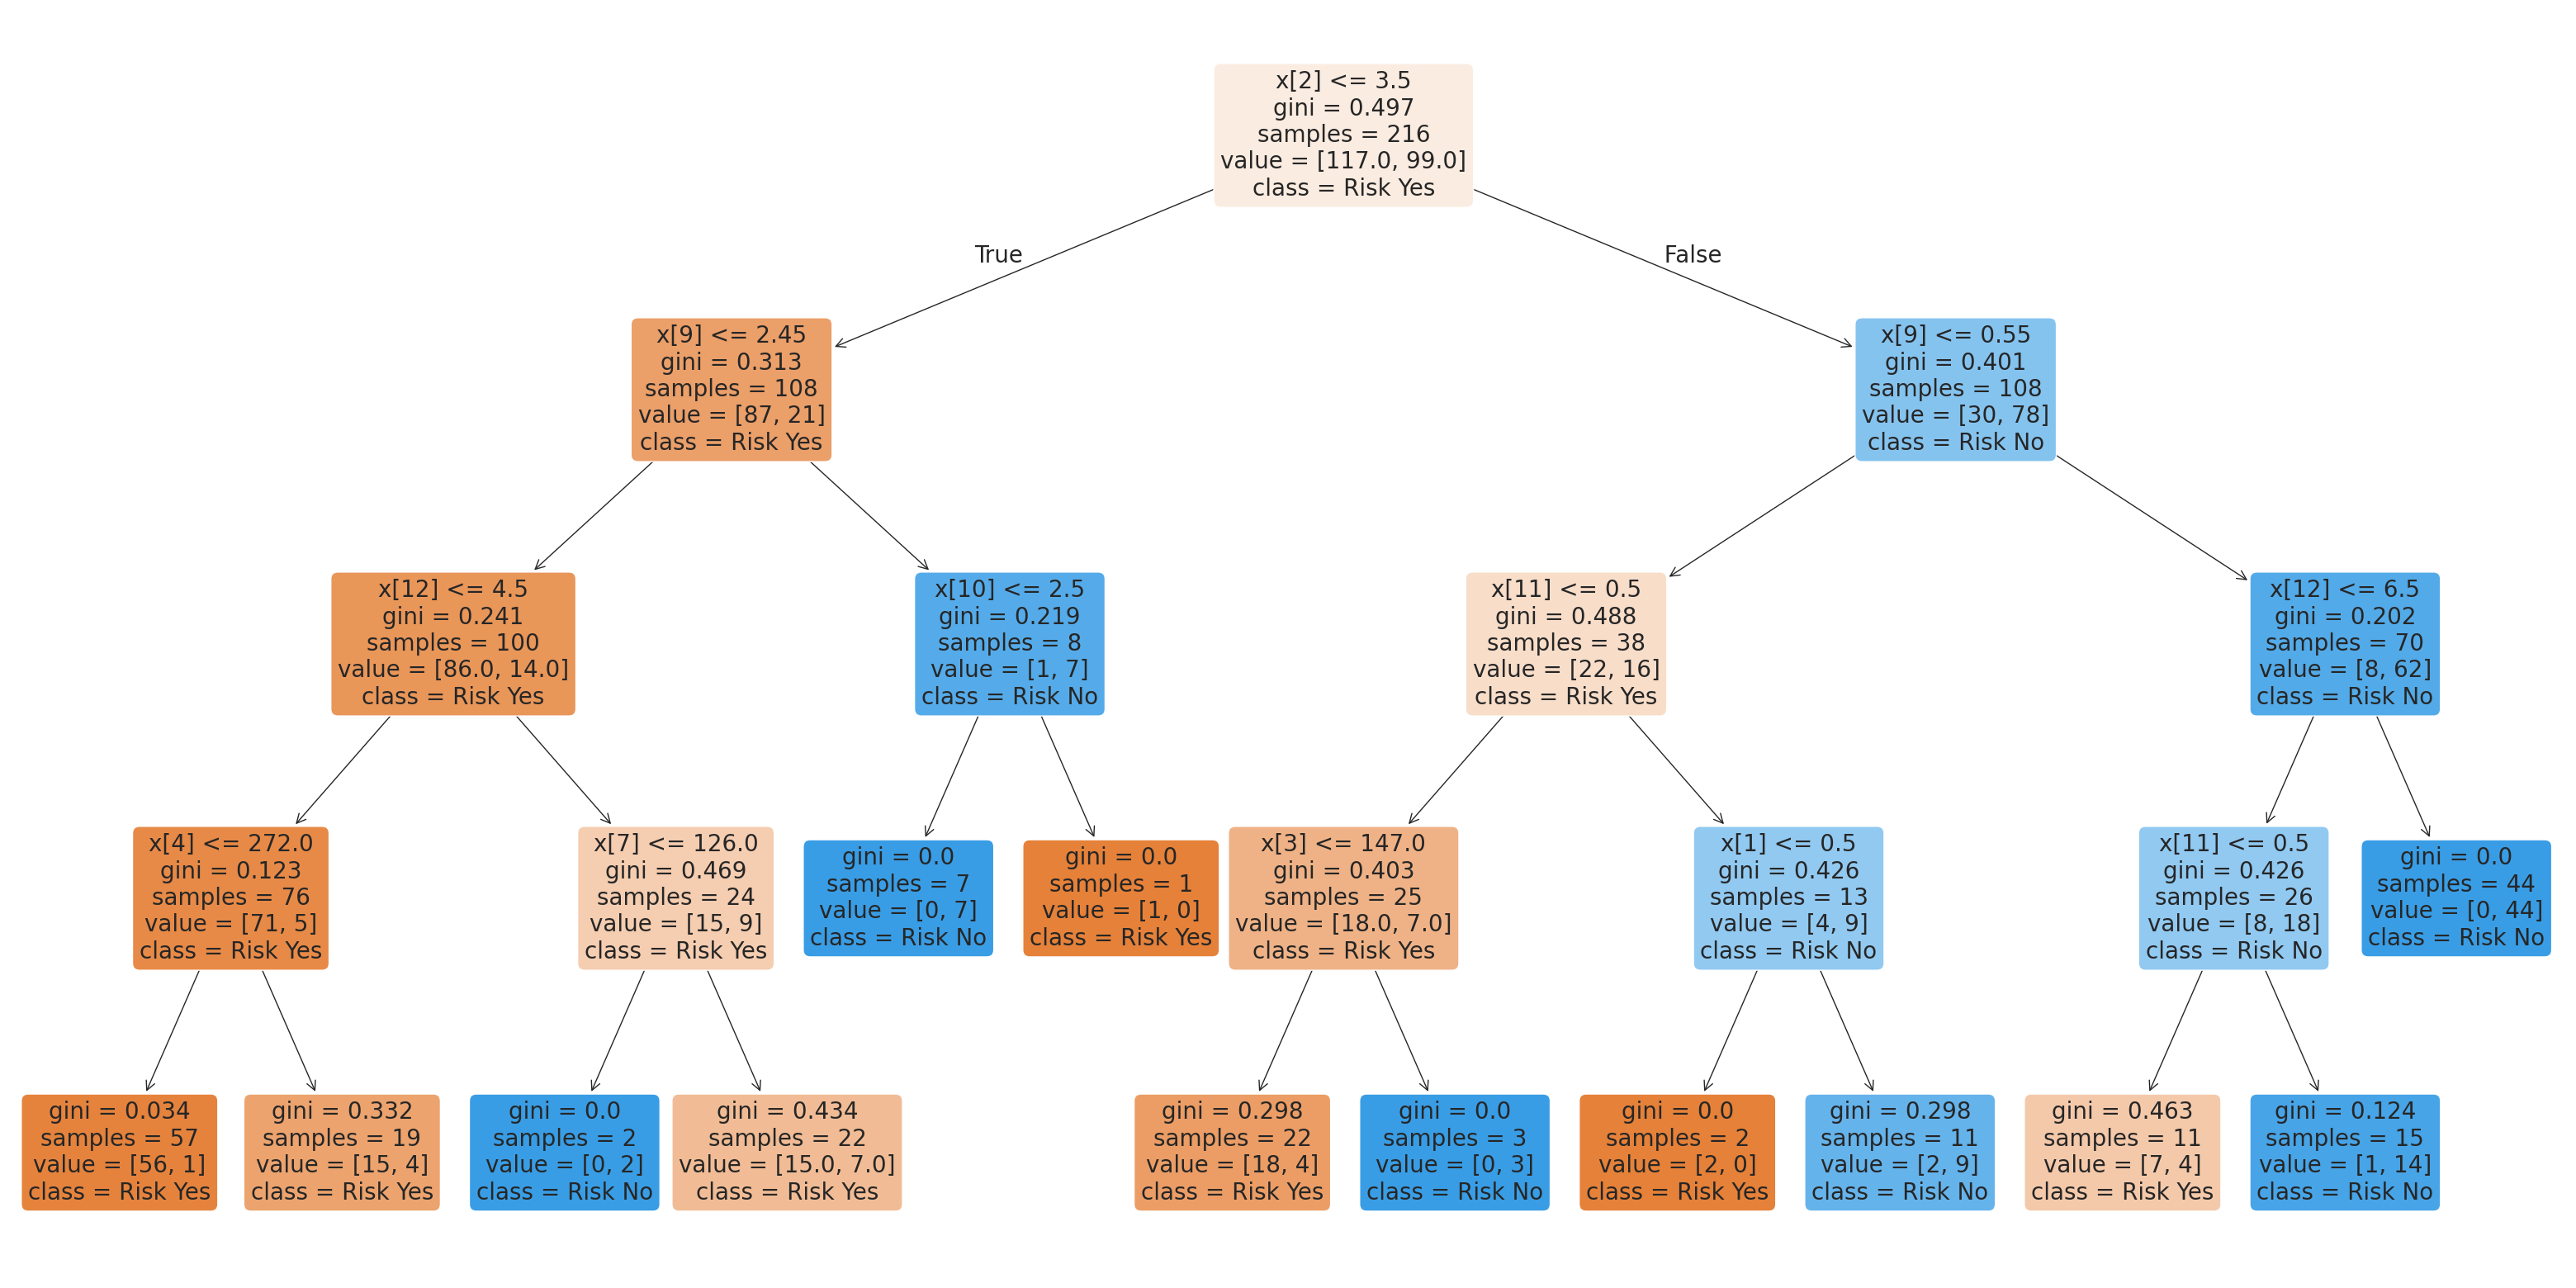

In [36]:
# Importing library
from sklearn.tree import DecisionTreeClassifier

# Creating decision tree model
model_dtc = DecisionTreeClassifier(max_depth = 4, random_state = 0)

# Model training
model_dtc_fit = model_dtc.fit(X_train, y_train)

#plot tree
# importing library to plot trees
from sklearn import tree
fig, ax = plt.subplots(figsize=(40, 20), facecolor = "w")
tree.plot_tree(model_dtc,
               ax = ax,
               fontsize = 20,
               rounded = True,
               filled = True,
               class_names = ["Risk Yes", "Risk No"])
plt.show()

In [37]:
# accuracy_score and y_train y_test
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.6990740740740741
Testing Accuracy: 0.7407407407407407


In [38]:
# Step 7: Make predictions on the test set
predictions = model.predict(X_test)

Feature importances

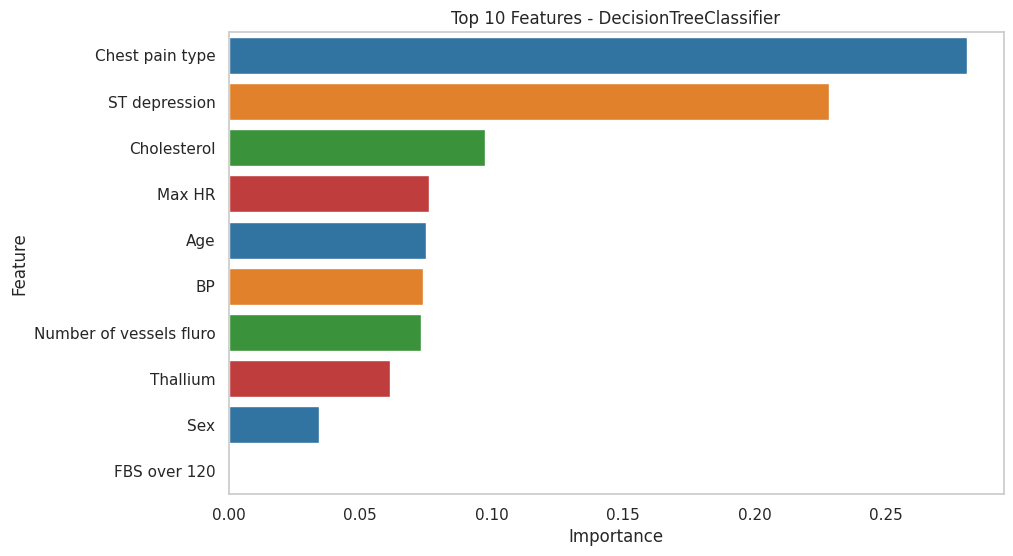

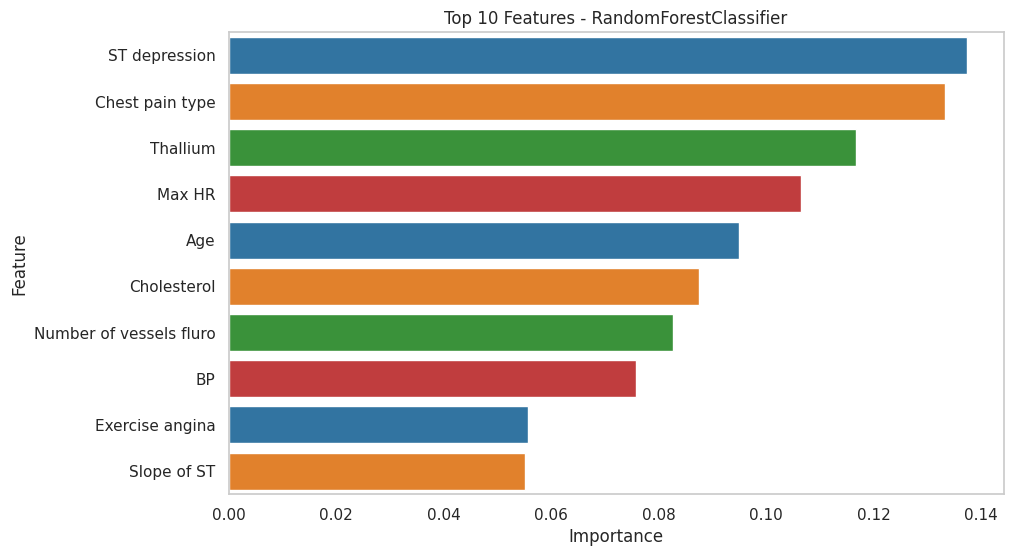

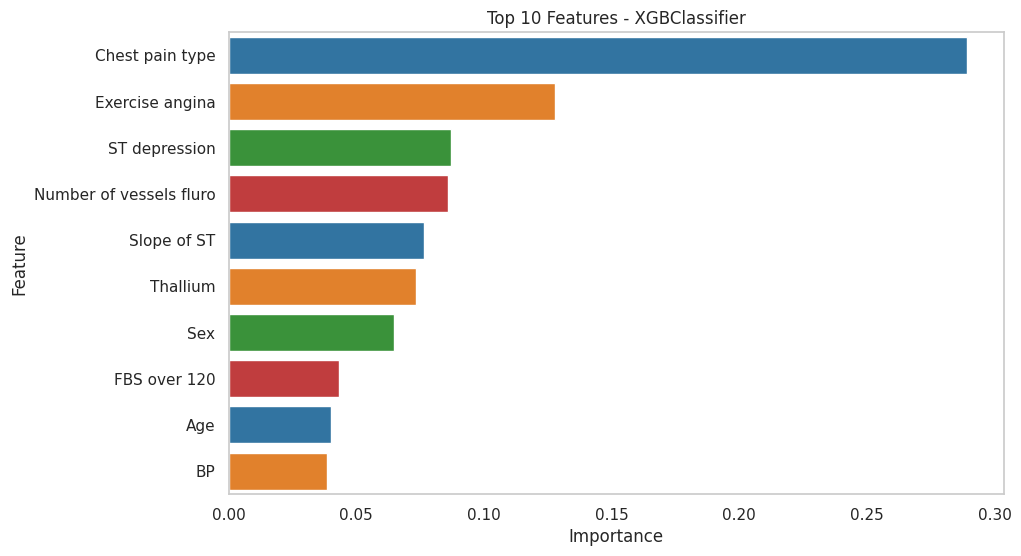

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 99, number of negative: 117
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.756944
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.245726
[LightGBM] [Debug] init for col-wise cost 0.000068 seconds, init for row-wise cost 0.000083 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458333 -> initscore=-0.167054
[LightGBM] [Info] Start training from score -0.167054
[LightGBM] [Warning] No further splits with positive gain, best gain

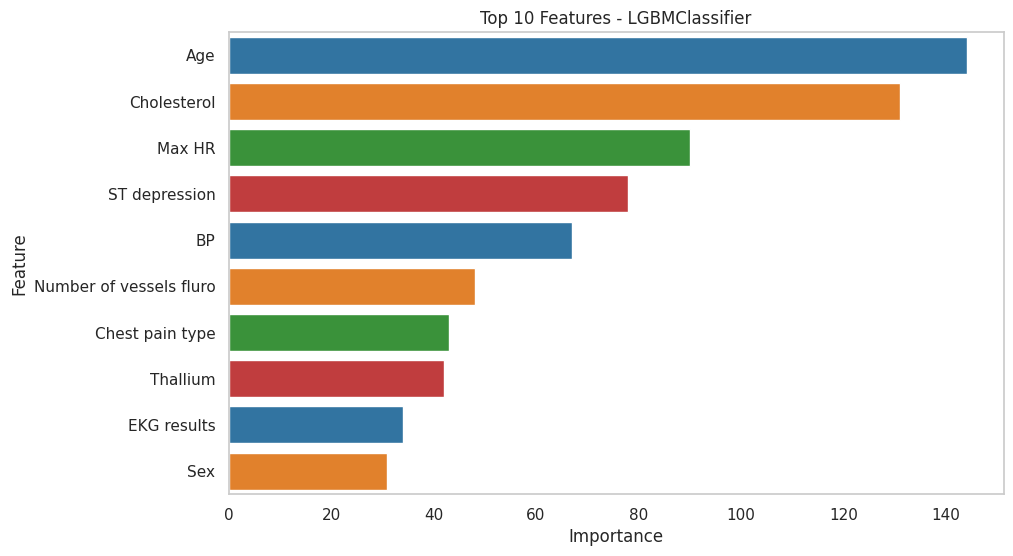

In [39]:
# Train models that support feature importances
models_with_feature_importances = [
    ("DecisionTreeClassifier", DecisionTreeClassifier(random_state=42)),
    ("RandomForestClassifier", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("XGBClassifier", XGBClassifier(random_state=42)),
    ("LGBMClassifier", LGBMClassifier(random_state=42))
]

# Custom color palette for plots
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Blue, Orange, Green, Red

# Iterate over models
for idx, (model_name, model) in enumerate(models_with_feature_importances):

    # Train model
    model.fit(X_train, y_train)

    # Get importance of features
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        # If the model does not have feature_importances_, continue to the next model
        print(f"{model_name} does not support feature importances.")
        continue

    # Create DataFrame for easier viewing
    feature_importances_df = pd.DataFrame({'Feature': X_train.columns,
                                           'Importance': feature_importances})

    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:10], palette=custom_palette[:len(feature_importances_df[:10])])
    plt.title(f"Top 10 Features - {model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()

Part 9 – Model Metrics

Model 1: GaussianNB
Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.9074074074074074


Confusion matrix 

 [[32  1]
 [ 4 17]]

True Positives(TP) =  32

True Negatives(TN) =  17

False Positives(FP) =  1

False Negatives(FN) =  4



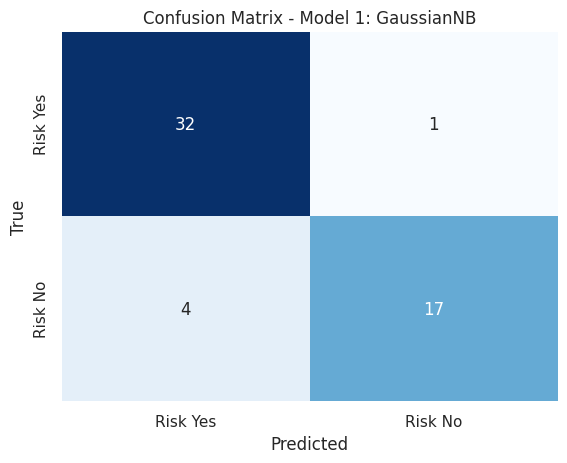

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666


Confusion matrix 

 [[21 12]
 [ 6 15]]

True Positives(TP) =  21

True Negatives(TN) =  15

False Positives(FP) =  12

False Negatives(FN) =  6



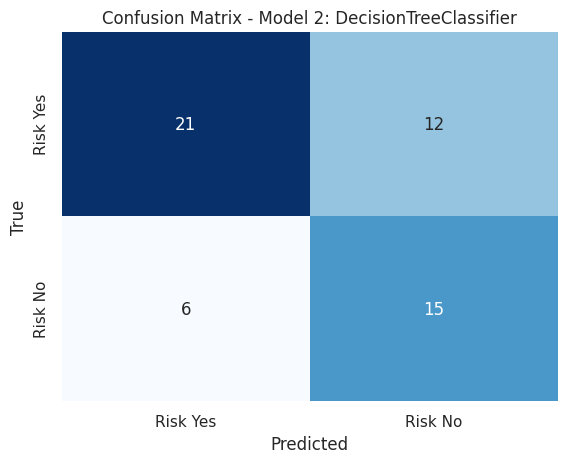

------------------
Model 3: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.7962962962962963


Confusion matrix 

 [[30  3]
 [ 8 13]]

True Positives(TP) =  30

True Negatives(TN) =  13

False Positives(FP) =  3

False Negatives(FN) =  8



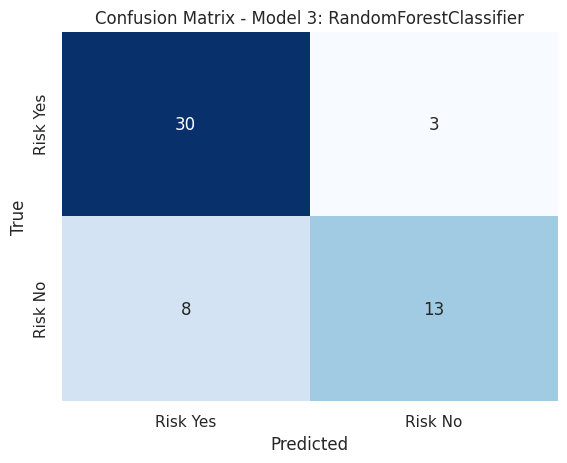

------------------
Model 4: LogisticRegression
Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.9074074074074074


Confusion matrix 

 [[32  1]
 [ 4 17]]

True Positives(TP) =  32

True Negatives(TN) =  17

False Positives(FP) =  1

False Negatives(FN) =  4



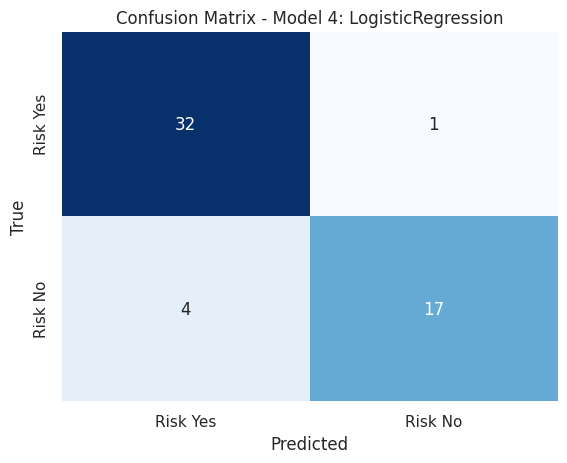

------------------
Model 5: AdaBoostClassifier
Training Accuracy: 0.8796296296296297
Testing Accuracy: 0.8333333333333334


Confusion matrix 

 [[29  4]
 [ 5 16]]

True Positives(TP) =  29

True Negatives(TN) =  16

False Positives(FP) =  4

False Negatives(FN) =  5



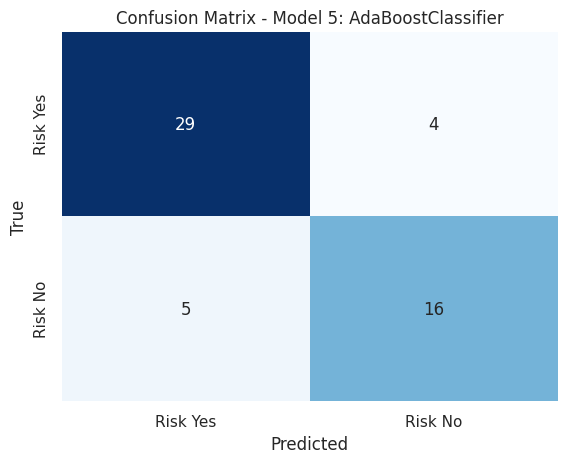

------------------
Model 6: XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.8148148148148148


Confusion matrix 

 [[30  3]
 [ 7 14]]

True Positives(TP) =  30

True Negatives(TN) =  14

False Positives(FP) =  3

False Negatives(FN) =  7



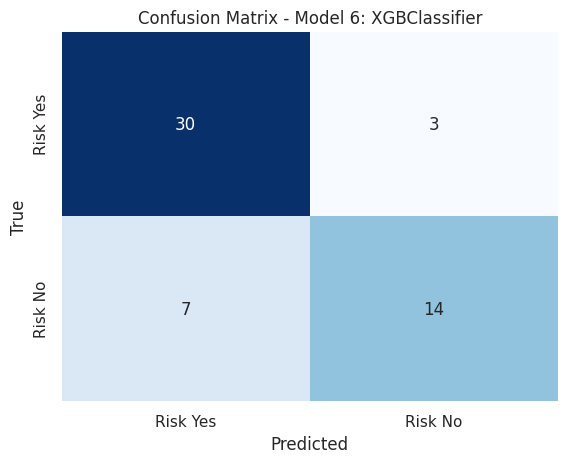

------------------
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Info] Number of positive: 99, number of negative: 117
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.756944
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeature

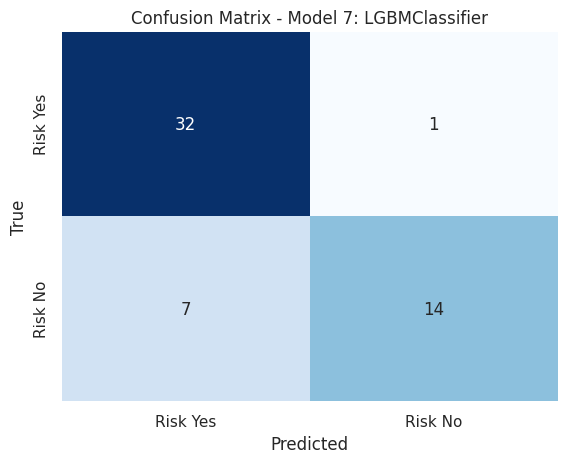

------------------
Model 8: KNeighborsClassifier
Training Accuracy: 0.6990740740740741
Testing Accuracy: 0.7407407407407407


Confusion matrix 

 [[26  7]
 [ 7 14]]

True Positives(TP) =  26

True Negatives(TN) =  14

False Positives(FP) =  7

False Negatives(FN) =  7



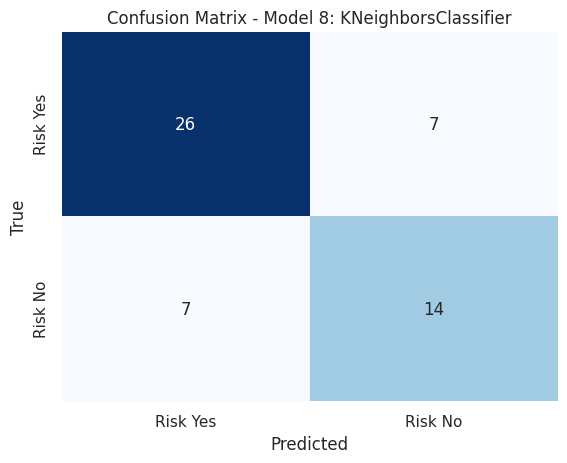

------------------


In [40]:
# plot matrix confusion
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print()

    # Calculate and plot the confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    print()
    print('Confusion matrix \n\n', cm)
    print('\nTrue Positives(TP) = ', cm[0,0])
    print('\nTrue Negatives(TN) = ', cm[1,1])
    print('\nFalse Positives(FP) = ', cm[0,1])
    print('\nFalse Negatives(FN) = ', cm[1,0])
    print()
    plt.figure()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Risk Yes", "Risk No"],
                yticklabels=["Risk Yes", "Risk No"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - Model {i+1}: {type(model).__name__}")
    plt.show()
    print("------------------")

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=50, subsample_freq=0 will be ignored. Current value: bagging_freq=50
[LightGBM] [Info] Number of positive: 99, number of negative: 117
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.756944
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.24

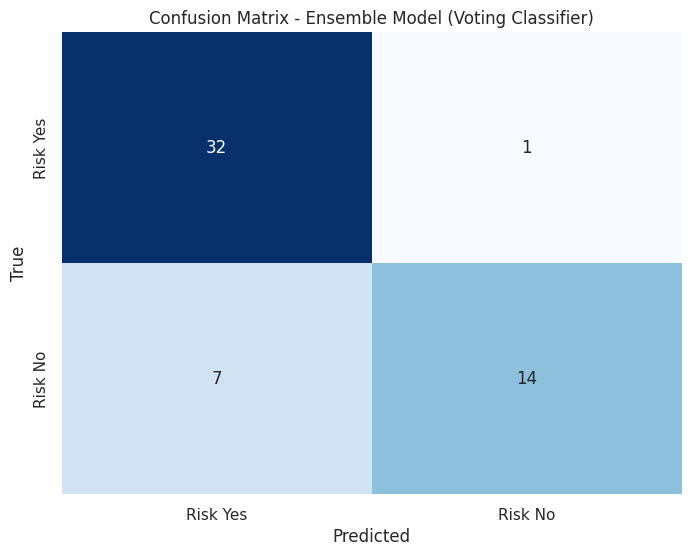

In [42]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier # Import VotingClassifier

voting_clf = VotingClassifier(estimators=[(type(model).__name__, model) for model in models], voting='hard') # Create VotingClassifier instance
voting_clf.fit(X_train, y_train) # Fit the VotingClassifier

# Calculate and plot the confusion matrix for the ensemble model (voting_clf)
cm = confusion_matrix(y_test, voting_clf.predict(X_test))

# Print the confusion matrix details
print('Confusion matrix \n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])
print()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Risk Yes", "Risk No"],
            yticklabels=["Risk Yes", "Risk No"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix - Ensemble Model (Voting Classifier)")
plt.show()

Model 1: GaussianNB
Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.9074074074074074


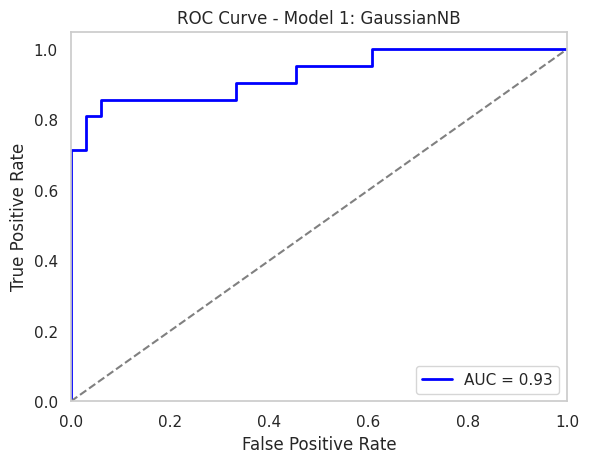

------------------
Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666


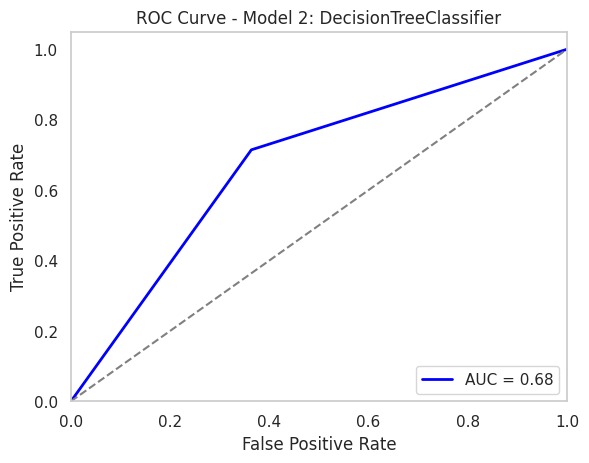

------------------
Model 3: KNeighborsClassifier
Training Accuracy: 0.7546296296296297
Testing Accuracy: 0.6296296296296297


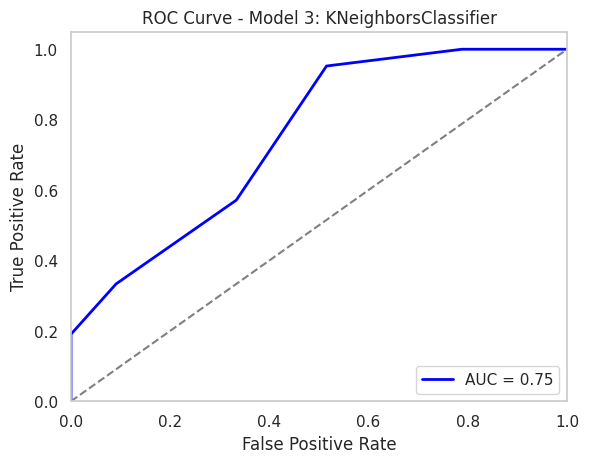

------------------
Model 4: RandomForestClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.7962962962962963


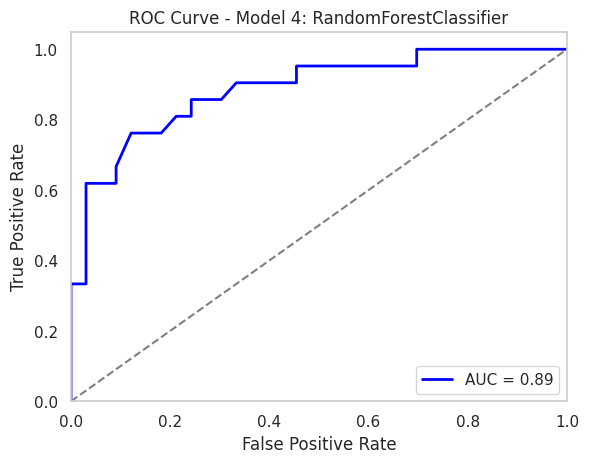

------------------
Model 5: LogisticRegression
Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.9074074074074074


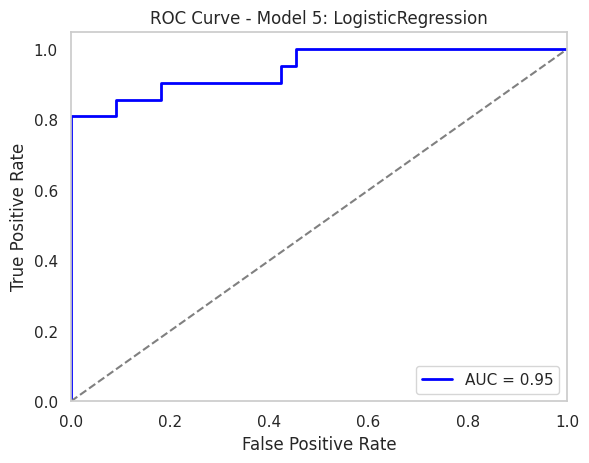

------------------
Model 6: AdaBoostClassifier
Training Accuracy: 0.8796296296296297
Testing Accuracy: 0.8333333333333334


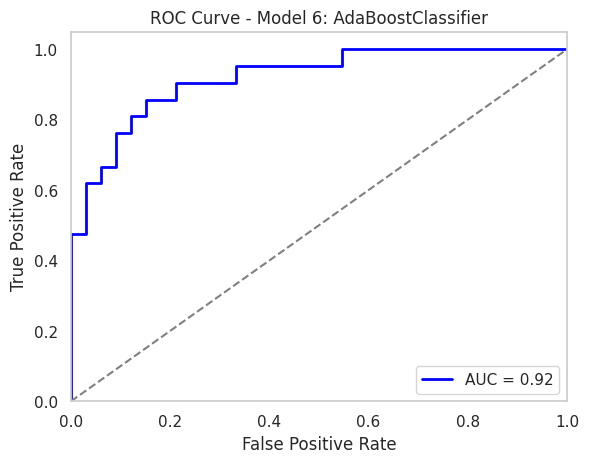

------------------
Model 7: SVC
Training Accuracy: 0.6759259259259259
Testing Accuracy: 0.6296296296296297


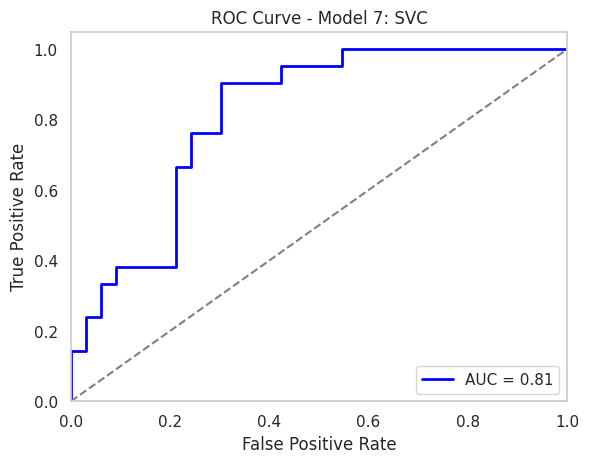

------------------
Model 8: GradientBoostingClassifier
Training Accuracy: 0.9953703703703703
Testing Accuracy: 0.7777777777777778


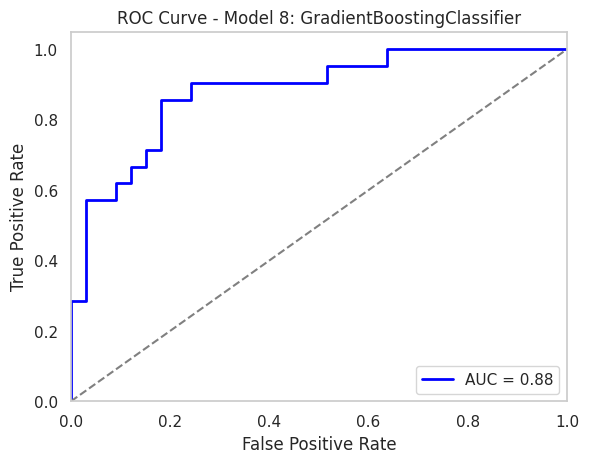

------------------
Model 9: XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.8148148148148148


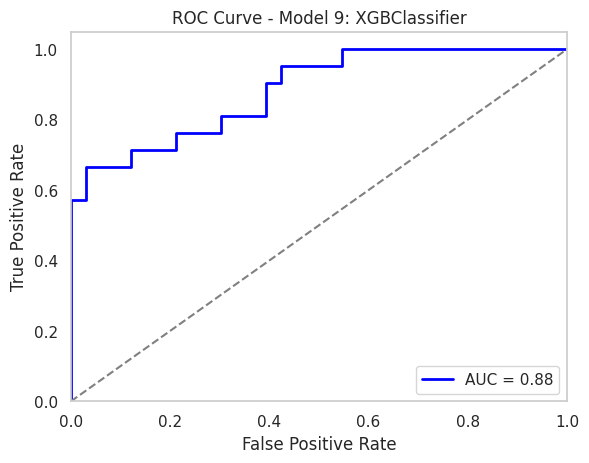

------------------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 99, number of negative: 117
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.756944
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.245726
[LightGBM] [Debug] init for col-wise cost 0.000052 seconds, init for row-wise cost 0.000093 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458333 -> initscore=-0.167054
[LightGBM] [Info] Start training from score -0.167054
[LightGBM] [Warning] No further splits with posit

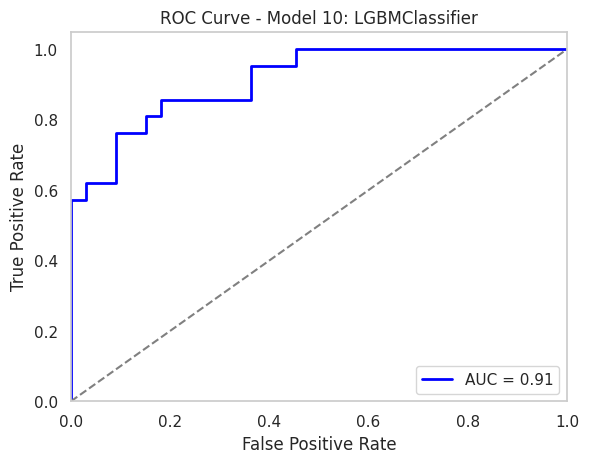

------------------


In [43]:
# ROC curve models

# Importing library
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Models to be evaluated
models = [
    GaussianNB(),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(),
    RandomForestClassifier(n_estimators=100, random_state=42),
    LogisticRegression(random_state=42),
    AdaBoostClassifier(random_state=42),
    SVC(random_state=42, probability=True),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
    LGBMClassifier()]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Calculate positive class probabilities
    y_probs = model.predict_proba(X_test)[:, 1]

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_probs)

    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_test, y_probs)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model {i+1}: {type(model).__name__}')
    plt.legend(loc="lower right")
    plt.grid(False)
    plt.show()

    print("------------------")

Part 11 - Model evaluation

In [44]:
# Classification report
# Importing library - classification_report models
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Models to be evaluated
models = [
          GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier()]

# Evaluate each model
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print()

    print(f"Model {i+1}: {type(model).__name__}")
    print()
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")

    # Generate rating report
    report = classification_report(y_test, model.predict(X_test))
    print()
    print("Classification Report:")
    print()
    print(report)
    print()

    print("=======================================")



Model 1: GaussianNB

Training Accuracy: 0.8518518518518519
Testing Accuracy: 0.9074074074074074

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.97      0.93        33
           1       0.94      0.81      0.87        21

    accuracy                           0.91        54
   macro avg       0.92      0.89      0.90        54
weighted avg       0.91      0.91      0.91        54



Model 2: DecisionTreeClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.6666666666666666

Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.64      0.70        33
           1       0.56      0.71      0.62        21

    accuracy                           0.67        54
   macro avg       0.67      0.68      0.66        54
weighted avg       0.69      0.67      0.67        54



Model 3: KNeighborsClassifier

Training Accuracy: 0.7546296296296297
Testing Accuracy: 0.6296296296296

Part 12 - Deep learning

In [45]:
# Importing libraries

# Importing libraries train test model
from sklearn.model_selection import train_test_split

# Importing library scaling
from sklearn.preprocessing import StandardScaler

# Importing library Neural network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers

In [46]:
# Database
df = pd.read_csv("/content/Heart_Disease_Prediction (2).csv")
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,80,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,55,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,65,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,45,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [47]:
# Encode categorical variables
label_encoder = LabelEncoder()

# Aplicando nas colunas transformando em númericas
df['Heart Disease'] = label_encoder.fit_transform(df['Heart Disease'])

# Viewing
label_encoder

LabelEncoder()

In [48]:
# Separate the resources (X) and the target column (y)
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Split data into training and validation sets
# Step 3: Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Viewing rows and columns
print("Viewing X_train rows and columns", X_train.shape)

# Viewing rows and columns
print("Viewing rows and columns y_train", y_train.shape)

Viewing X_train rows and columns (216, 13)
Viewing rows and columns y_train (216,)


In [49]:
# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Viewing
scaler

StandardScaler()

Neural network

In [50]:
## Neural network

# Initialize the model
nn_model = Sequential()

# Add input layer and first hidden layer
nn_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))

# Add additional hidden layers
nn_model.add(Dense(16, activation='relu'))
nn_model.add(Dense(8, activation='relu'))

# Add output layer
nn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary - Neural network
nn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Train the model
history = nn_model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2)

Epoch 1/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.4020 - loss: 0.7383 - val_accuracy: 0.5000 - val_loss: 0.6927
Epoch 2/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4371 - loss: 0.7159 - val_accuracy: 0.5000 - val_loss: 0.6731
Epoch 3/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4897 - loss: 0.6856 - val_accuracy: 0.5909 - val_loss: 0.6564
Epoch 4/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4984 - loss: 0.6721 - val_accuracy: 0.6364 - val_loss: 0.6430
Epoch 5/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5601 - loss: 0.6563 - val_accuracy: 0.6818 - val_loss: 0.6288
Epoch 6/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.6668 - loss: 0.6269 - val_accuracy: 0.7045 - val_loss: 0.6143
Epoch 7/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7232 - loss: 0.6108 - val_accuracy: 0.7273 - val_loss: 0.5980
Epoch 8/150
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7497 - loss: 0.6015 - val_accuracy: 0.7955 - val_loss

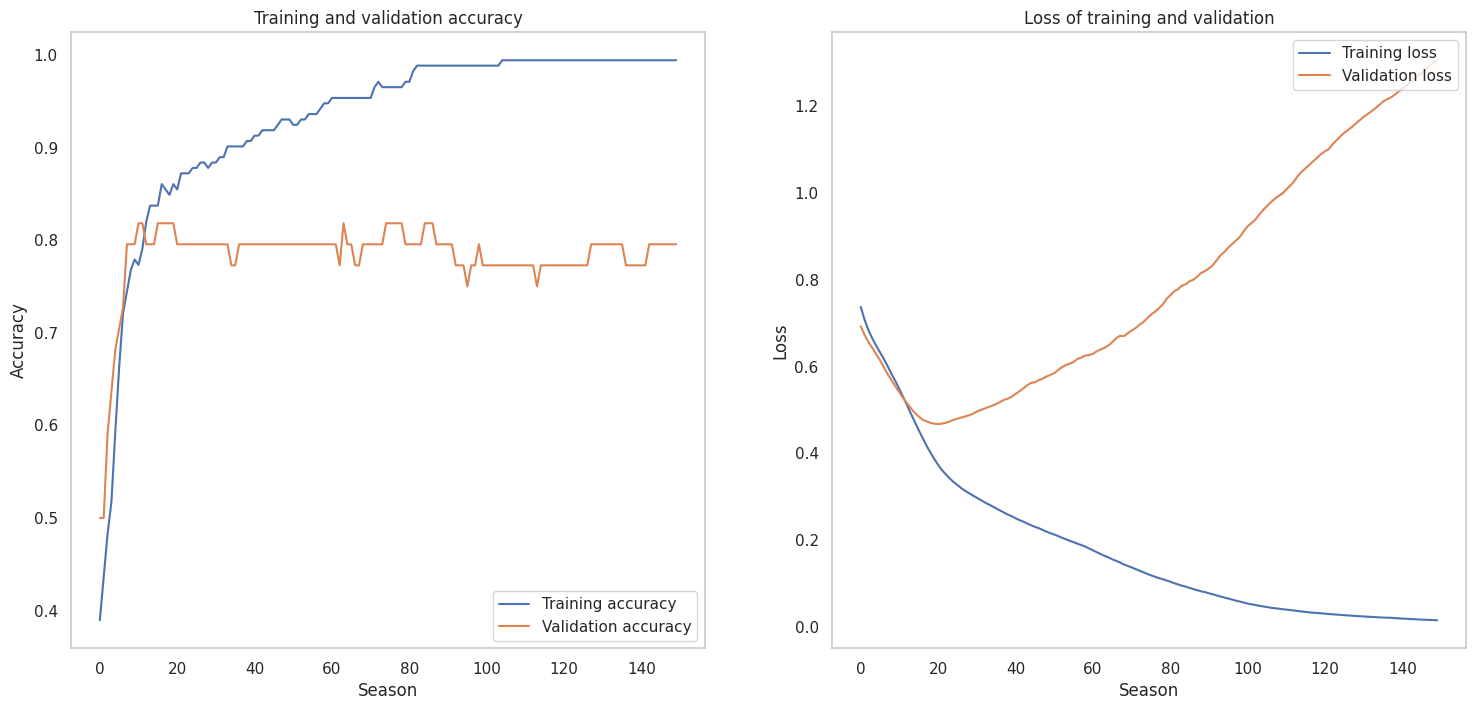

In [52]:
# Function to plot training and validation graphs
def plot_history(history):
    # Accuracy graph
    plt.figure(figsize=(18, 8))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.xlabel('Season')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and validation accuracy')
    plt.grid(False)

    # Loss graph
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.xlabel('Season')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title('Loss of training and validation')
    plt.grid(False)
    plt.show()

# Plot the graphs
plot_history(history)

In [53]:
# Evaluate the model
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8492 - loss: 0.5763
Test accuracy: 0.8518518805503845


In [54]:
# Make predictions
predictions_ANN = nn_model.predict(X_test)
predictions_ANN = (predictions_ANN > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_ANN)
print(f'Accuracy Neural network: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
Accuracy Neural network: 0.8518518518518519


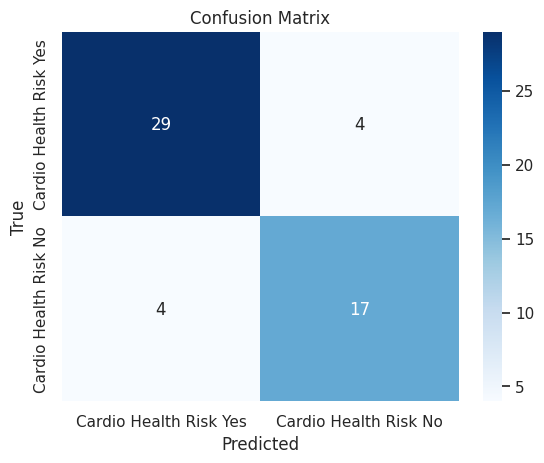

In [55]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions_ANN)

# Display the confusion matrix using seaborn with labels 'Benign' and 'Malignant'
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Cardio Health Risk Yes", "Cardio Health Risk No"],
            yticklabels=["Cardio Health Risk Yes", "Cardio Health Risk No"])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [56]:
# Confusion Matrix and Classification Report
print(classification_report(y_test, predictions_ANN))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        33
           1       0.81      0.81      0.81        21

    accuracy                           0.85        54
   macro avg       0.84      0.84      0.84        54
weighted avg       0.85      0.85      0.85        54



Part 13 - Result models

In [57]:

nn_predictions_train = (nn_model.predict(X_train) > 0.5).astype(int)
nn_predictions_test = (nn_model.predict(X_test) > 0.5).astype(int)
nn_train_accuracy = accuracy_score(y_train, nn_predictions_train)
nn_test_accuracy = accuracy_score(y_test, nn_predictions_test)
nn_report = classification_report(y_test, nn_predictions_test, output_dict=True)

# Extract metrics of interest from the report
nn_metrics = {"Model": "NeuralNetwork",
              "Accuracy": nn_test_accuracy,
              "Precision": nn_report['weighted avg']['precision'],
              "Recall": nn_report['weighted avg']['recall'],
              "F1-score": nn_report['weighted avg']['f1-score'],
              "Support": nn_report['weighted avg']['support']
             }

# Models to be evaluated
models = [GaussianNB(),
          DecisionTreeClassifier(random_state=42),
          KNeighborsClassifier(),
          RandomForestClassifier(n_estimators=100, random_state=42),
          LogisticRegression(random_state=42),
          AdaBoostClassifier(random_state=42),
          XGBClassifier(random_state=42),
          LGBMClassifier()
         ]

# List to store metrics for each model
metricas = []
# Evaluate each model
for model in models:
    model.fit(X_train, y_train)
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    report = classification_report(y_test, model.predict(X_test), output_dict=True)

    # Extract metrics of interest from the report
    metrics = {"Model": type(model).__name__,
               "Accuracy": test_accuracy,
               "Precision": report['weighted avg']['precision'],
               "Recall": report['weighted avg']['recall'],
               "F1-score": report['weighted avg']['f1-score'],
               "Support": report['weighted avg']['support']
              }
    metricas.append(metrics)

# Add neural network metrics to the list
metricas.append(nn_metrics)

# Convert the list of dictionaries into a DataFrame
df_metricas = pd.DataFrame(metricas)

# Function to highlight the maximum value in each column
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
# Apply the highlighting function
df_metricas_styled = df_metricas.style.apply(highlight_max, subset=['Accuracy',
                                                                    'Precision',
                                                                    'Recall',
                                                                    'F1-score'])

# Display the styled DataFrame with metrics
df_metricas_styled

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[LightGBM] [Info] Number of positive: 99, number of negative: 117
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.066595
[LightGBM] [Debug] init for col-wise cost 0.000007 seconds, init for row-wise cost 0.000079 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 232
[LightGBM] [Info] Number of data points in the train set: 216, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.458333 -> initscore=-0.167054
[LightGBM] [Info] Start training from score -0.167054
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Debug] Trained a tree with leaves = 8 and depth = 4
[LightGBM] [W

,Model,Accuracy,Precision,Recall,F1-score,Support
0,GaussianNB,0.907407,0.910494,0.907407,0.905859,54.000000
1,DecisionTreeClassifier,0.666667,0.691358,0.666667,0.670833,54.000000
2,KNeighborsClassifier,0.777778,0.776365,0.777778,0.772431,54.000000
3,RandomForestClassifier,0.796296,0.798428,0.796296,0.789705,54.000000
4,LogisticRegression,0.888889,0.888889,0.888889,0.888889,54.000000
5,AdaBoostClassifier,0.833333,0.832353,0.833333,0.832545,54.000000
6,XGBClassifier,0.814815,0.815757,0.814815,0.810359,54.000000
7,LGBMClassifier,0.833333,0.833333,0.833333,0.830546,54.000000
8,NeuralNetwork,0.851852,0.851852,0.851852,0.851852,54.000000
